<a href="https://colab.research.google.com/github/Raghavardhini/Raghavardhini/blob/main/hierarchicalcluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("/content/ipl.csv")
dataset

,Teams,Matches,Won,Lost,Points
0,RR,6,5,1,10
1,KKR,4,3,1,6
2,CSK,5,3,2,6
3,LSG,5,3,2,6
4,SRH,5,3,2,6
5,GT,6,3,3,6
6,MI,5,2,3,4
7,PBKS,6,2,4,4
8,DC,6,2,4,4
9,RCB,6,1,5,2


In [3]:
dataset.shape


(10, 5)

In [4]:
dataset.head()

,Teams,Matches,Won,Lost,Points
0,RR,6,5,1,10
1,KKR,4,3,1,6
2,CSK,5,3,2,6
3,LSG,5,3,2,6
4,SRH,5,3,2,6


In [5]:
x = dataset.iloc[:, [3, 4]].values

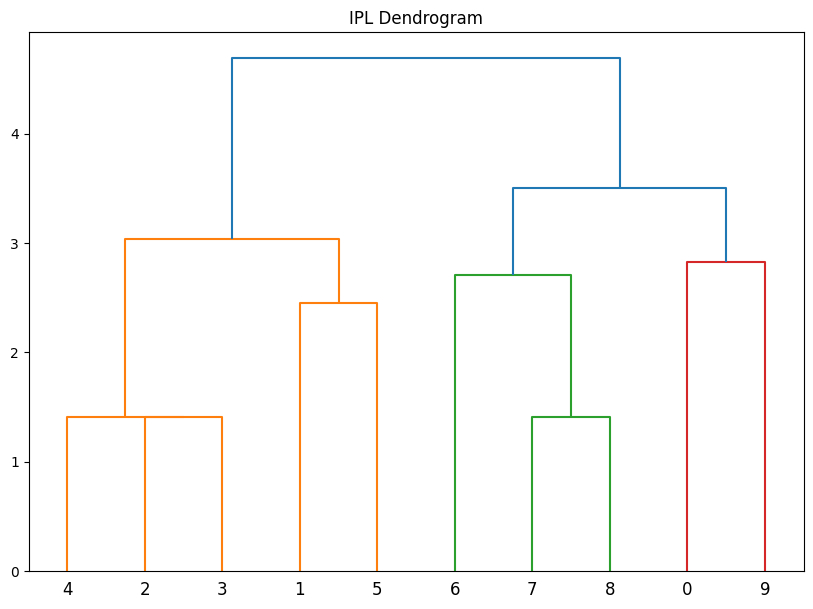

In [6]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(dataset).toarray()
plt.figure(figsize=(10, 7))
plt.title("IPL Dendrogram")
dend = shc.dendrogram(shc.linkage(data_encoded, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
y_pred= hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
y_pred

array([7, 6, 9, 8, 3, 4, 5, 1, 2, 0])

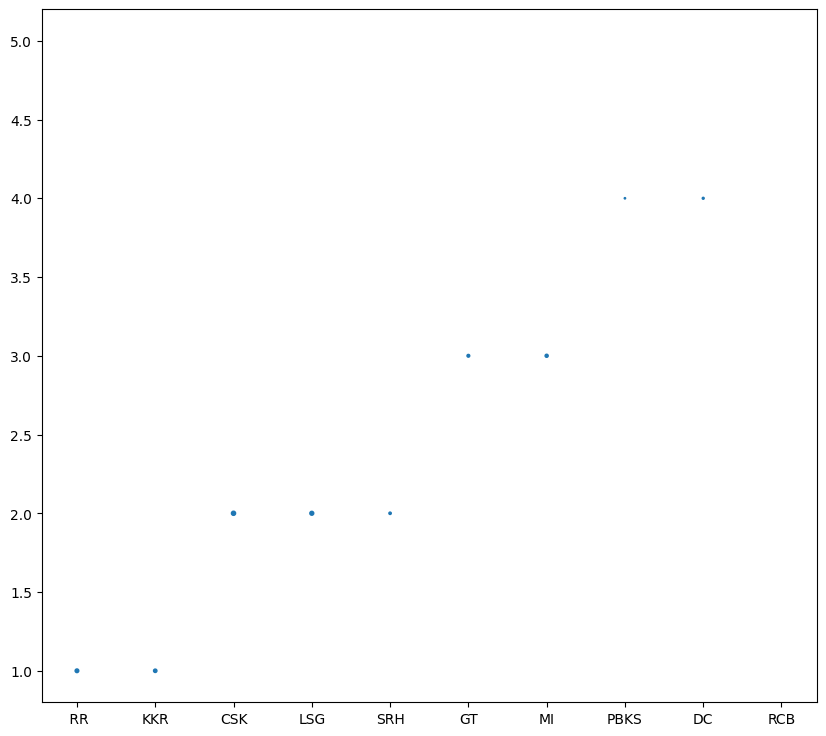

In [9]:

plt.figure(figsize=(10, 9))
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,3],  y_pred)
plt.show()